0630

In [41]:
pip install mglearn #mglearn 설치하기

In [42]:
# 한글깨짐 방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [1]:
import mglearn
import matplotlib.pyplot as plt

#k-최근접 이웃

## k-최근접 이웃 분류: 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트를 찾음<br>
-> 최근접 이웃(Nearest Neighbors)

## forge 데이터셋 분류 예 <br>
-> forge 데이터셋에 대한 1-최근접 이웃 모델의 예측

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


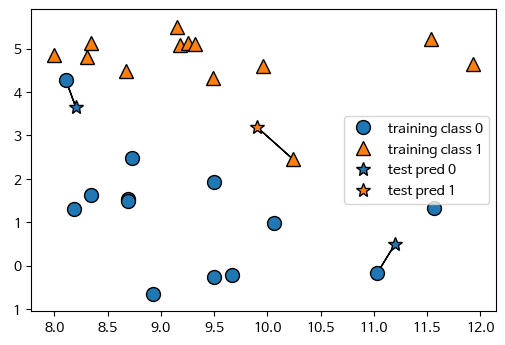

In [2]:
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic')

mglearn.plots.plot_knn_classification(n_neighbors=1) # 제일 근접한 1개 이웃 선택

# 헷갈리면 n_neighbors= 의 수를 수정해보기. 주변 이웃의 개수에 따라 예측 값이 달라지기 때문

# n_neighbors=1일 경우, test pred0은 동글 마크와 근접하기에 training class0으로 인식할 것이고
# n_neighbors=1일 경우, test pred1은 세모 마크와 근접하기에 traing class1로 인식


forge 데이터 분류 예<br>
-> forge 데이터셋에 대한 3-최근접 이웃 모델의 예측

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


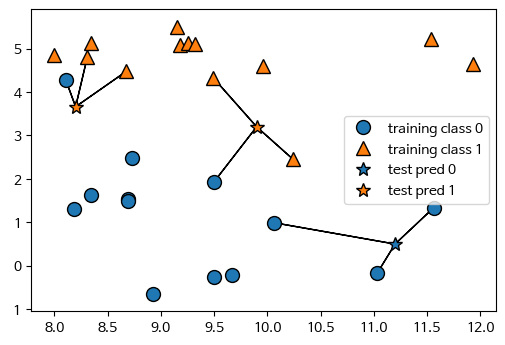

In [3]:
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic')

mglearn.plots.plot_knn_classification(n_neighbors=3) # 제일 근접한 3개 이웃 선택

X: 데이터는 대문자 X로 표현(입력)<br>
y: 레이블은 소문자 y로 표현(출력)
* 2차원 배열 대문자 X, 1차원 배열(벡터) 소문자 y

train_test_split 함수 default로 분리 비율(75% : 25%)<br>
random_state: 랜덤 시드 고정

# 분류 문제정의: forge 데이터셋을 사용한 이진 분류(Label, 1) 예측하기
k-최근접 이웃 알고리즘 적용하여 예측하고 평가하기

##데이터 준비하기

In [4]:
X, y = mglearn.datasets.make_forge() # X : 데이터(feature), y : 레이블(label, 정답)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


일반화 성능을 평가할 수 있도록 데이터 분리(교차검증) -> 훈련세트(trainset) 테스트세트(testset)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7) # test 주고 train 준 후에 random으로 잘라라
# 대소문자 구분 잘하기, X 적고, y 적기 섞어 적으면 값 섞임
# random_state=n 숫자(n)는 큰 의미 없음/ random_state 나눔에 초점 맞추기

KNeighborsClassifier를 임포트하고 객체 생성

In [6]:
from sklearn.neighbors import KNeighborsClassifier


# clf 변수 선언(classifier)
clf = KNeighborsClassifier(n_neighbors=3) # 이웃의 수 3개 지정

훈련 세트를 사용하여 분류 모델 학습

In [7]:
clf.fit(X_train, y_train) # 여기 문제집 있고 정답 있으니 학습해

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## 테스트 데이터에 대해 predict 메서드를 호출하여 예측
가장 많은 클래스를 찾기 -> 예측

In [8]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1])

모델이 얼마나 잘 일반화되었는지 평가 -> 정확도

score() 함수 사용 -> 테스트 데이터와 테스트 레이블을 넣어 호출

In [9]:
# clf.fit 호출한 다음에 .score해야 함 그렇지 않으면 오류 발생 
clf.score(X_test, y_test)

0.8571428571428571

In [10]:
clf.score(X_train, y_train)

0.9473684210526315

KNeighborsClassifier 분석


1.   이웃의 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
2.   이웃의 수를 늘릴수록 결정 경계는 더 부드러워짐
3. 부드러운 경계는 더 단순한 모델을 의미



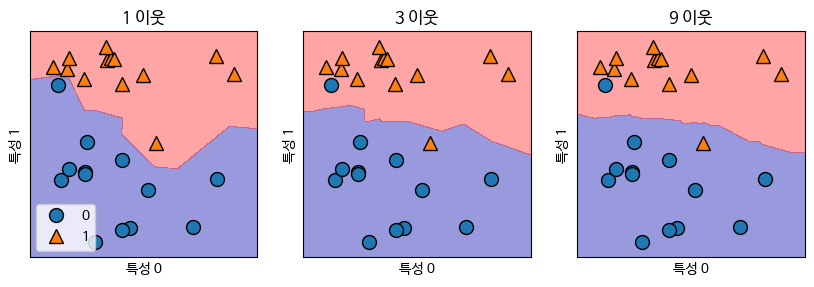

In [11]:
fig, axes = plt.subplots(1,3, figsize=(10,3), dpi = 100)
# 3개의 axes(객체)를 그린다.

for n_neighbors, ax in zip([1, 3, 9], axes) : # 이웃을 1, 3, 9일 때의 결정 경계(decision boundary)
  # (n_neighbors, ax) => 1, axes/ 3, axes/ 9, axes
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)

  # 2차원 데이터셋 분할 평면 그리기 mglearn.plot_2d_separator(model 객체, train 데이터, 평면 칠하기, 투명도)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax) # 2차원 산점도 그리기 위해

  ax.set_title("{} 이웃".format(n_neighbors))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

axes[0].legend(loc=3)
plt.show()


# 결과로 나온 차트만 보고 이웃의 수를 어떻게 정해야할 지는 알 수 없다
# 성능 평가를 통해 어떤 것이 좋은 모델인지 확인하자 ↓

##이웃의 수(결정경계)에 따른 성능 평가

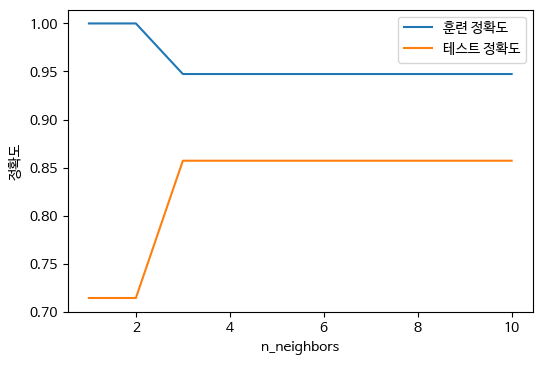

In [12]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuarcy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))

  # 테스트 세트 정확도 저장
  test_accuarcy.append(clf.score(X_test, y_test))

# 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic')

plt.plot(neighbors_settings, train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuarcy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()


# 이웃이 3인 것을 선택하는 것이 합리적

#유방암 데이터셋을 사용하여 이웃의 수(결정경계)에 따른 성능 평가

## 데이터 준비하기

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # 데이터 다운로드

## 데이터셋 분리하기(훈련셋, 테스트셋)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=77)
 #stratify: 비율이 비슷하게 잘리도록 추출)

##이웃의 수(결정경계)에 따른 성능 평가

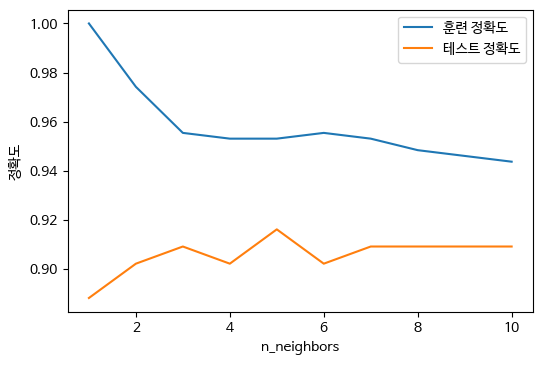

In [15]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuarcy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))

  # 테스트 세트 정확도 저장
  test_accuarcy.append(clf.score(X_test, y_test))

# 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic')

plt.plot(neighbors_settings, train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuarcy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

# random_state=77인 경우, 아래의 차트를 보고 어디를 선택해야할까? 이웃의 수: 5
# 테스트 정확도가 가장 높은 지표를 선택
# 데이터 값의 여러개의 차트를 그려보고 그 중 평균을 내는 방법도 있음

random_state의 수가 달라졌을 경우 살펴보기<br>
random_state=77 => random_state=777

In [16]:
# random_state=777인 경우, 위와 같지만 숫자만 달라짐


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=777)
 #stratify: 비율이 비슷하게 잘리도록 추출)

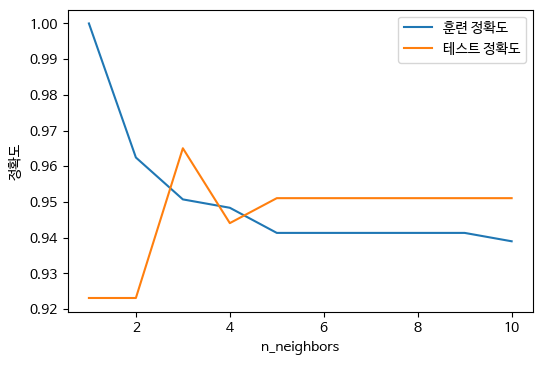

In [17]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuarcy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))

  # 테스트 세트 정확도 저장
  test_accuarcy.append(clf.score(X_test, y_test))

# 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic')

plt.plot(neighbors_settings, train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuarcy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

# random_state=777인 경우, 아래의 차트를 보고 어디를 선택해야할까? 이웃의 수: 3
# 아래 차트에서 이웃의 수가 1인 경우 훈련 정확도는 오버피팅 된 것으로 보임

##성능평가 - ROC 커브

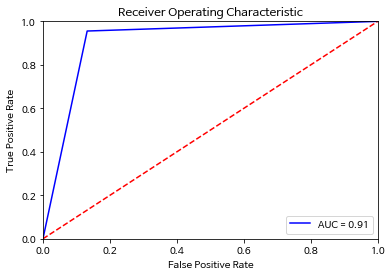

In [18]:
# Library for Analysing the ML model
from sklearn import metrics

# 모델 생성
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = clf.predict(X_test)

# 모델 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.92      0.96      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



In [20]:
# sklearn을 이용하면 전부 계산
print('accuracy: ', metrics.accuracy_score(y_test, y_hat))
print('precision: ', metrics.precision_score(y_test, y_hat))
print('recall: ', metrics.recall_score(y_test, y_hat))
print('f1: ', metrics.f1_score(y_test, y_hat))

accuracy:  0.9230769230769231
precision:  0.9247311827956989
recall:  0.9555555555555556
f1:  0.9398907103825136


#k-Neighbors Regression

1.   k=1 경우 그냥 가장 가까운 이웃의 타켓값
2.   k>=2 경우 회귀분석 -> 여러 개의 최근접 이웃 간의 평균(average or mean)이 예측 값



## wave 데이터셋을 사용하여 이웃의 수(결정경계)에 따라 성능 평가

##데이터 셋 분리하기(훈련셋, 테스트셋)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

KNeighborsRegressor를 임포트하고 객체 생성

In [22]:
# 이웃의 수는 3으로 하여 모델 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)

훈련 세트를 사용하여 회귀 모델 학습

In [23]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

## 성능평가 하기

In [24]:
reg.score(X_test, y_test)

0.8344172446249604

In [25]:
# score r-square 결정계수 0~1 사이 값을 갖고, 관계가 높을수록 1에 가까운 값을 가짐
# 0에 가까울수록 데이터 분포를 제대로 표현하지 못한 것

print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test, y_test)))


테스트 세트 R^2: 0.83


KNeighborsRegressor 분석

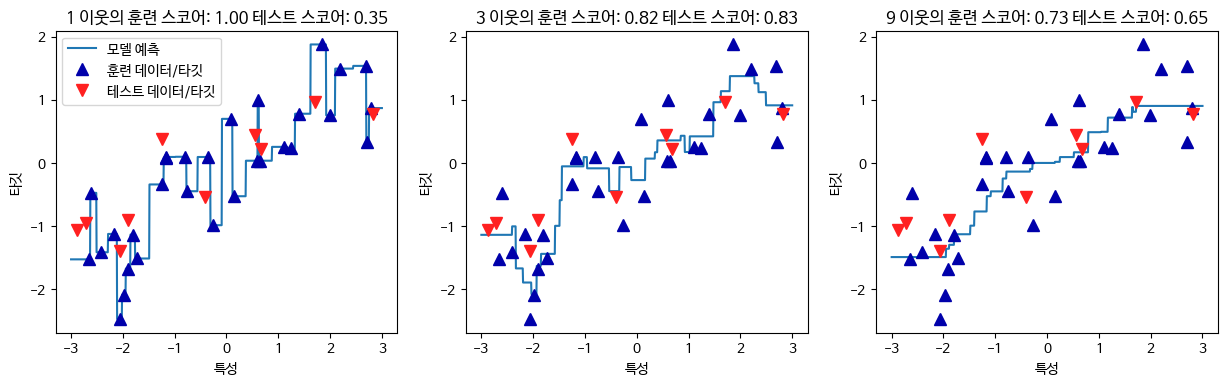

In [26]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4),dpi = 100)
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()


#선형 모델: 선형 함수를 만들어 예측 수행

## 선형 회귀 모델

w[0]: 0.393906  b: -0.031804


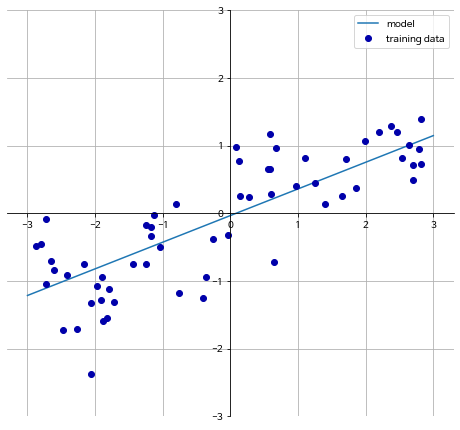

In [27]:
mglearn.plots.plot_linear_regression_wave()

## 선형회귀(최소제곱법)

데이터 준비하기

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

선형모델 만든 후 학습시키기

In [29]:
lr = LinearRegression().fit(X_train, y_train)

lr 객체 확인하기

In [30]:
print('lr.coef_: ', lr.coef_) # w 가중치, 기울기
print('lr.intercept_: ', lr.intercept_) # 절편

# 뒤에 _가 있는 이유는 내가 지정한 변수와 헷갈릴 것을 방지하기 위함임

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


성능 평가

In [31]:
print('훈련 세트 점수 : ', lr.score(X_train, y_train))
print('테스트 세트 점수 : ', lr.score(X_test, y_test))
# 훈련-테스트 세트의 점수가 비슷하고, 낮으면 과소 적합된 상황

훈련 세트 점수 :  0.6700890315075756
테스트 세트 점수 :  0.65933685968637


## 보스턴 주택가격 데이터셋을 사용한 선형 회귀 성능 평가

In [32]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

훈련 데이터셋으로 학습하기

In [33]:
lr = LinearRegression().fit(X_train, y_train)

성능 평가하기

In [34]:
print('훈련 세트 점수 : ', lr.score(X_train, y_train))
print('테스트 세트 점수 : ', lr.score(X_test, y_test)) # 과대 적합 상태

훈련 세트 점수 :  0.9520519609032727
테스트 세트 점수 :  0.607472195966557


##릿지 회귀 -> 규제를 통해서 과대적합 되지 않게 하기 위한 선형 모델

보스턴 주택가격 데이터세을 사용한 릿지 회귀 성능 평가

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha=1.0

성능 평가

In [36]:
print('훈련 세트 점수 : ', ridge.score(X_train, y_train))
print('테스트 세트 점수 : ', ridge.score(X_test, y_test))

훈련 세트 점수 :  0.8857966585170941
테스트 세트 점수 :  0.7527683481744751


alpha 매개변수를 통해 모델 설정

In [37]:
# alpha 값만 조정하여 성능 평가
# alpha의 기본값은 1.0
# alpha 10으로 해보기 => 규제를 강력하게 준다

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수 : ', ridge10.score(X_train, y_train))
print('테스트 세트 점수 : ', ridge10.score(X_test, y_test))

훈련 세트 점수 :  0.7882787115369614
테스트 세트 점수 :  0.6359411489177309


In [38]:
# alpha 값만 조정하여 성능 평가
# alpha 0.1으로 해보기 => 규제를 느슨하게 풀어준다

ridge10 = Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 세트 점수 : ', ridge10.score(X_train, y_train))
print('테스트 세트 점수 : ', ridge10.score(X_test, y_test))

훈련 세트 점수 :  0.9282273685001992
테스트 세트 점수 :  0.7722067936479818


NameError: ignored

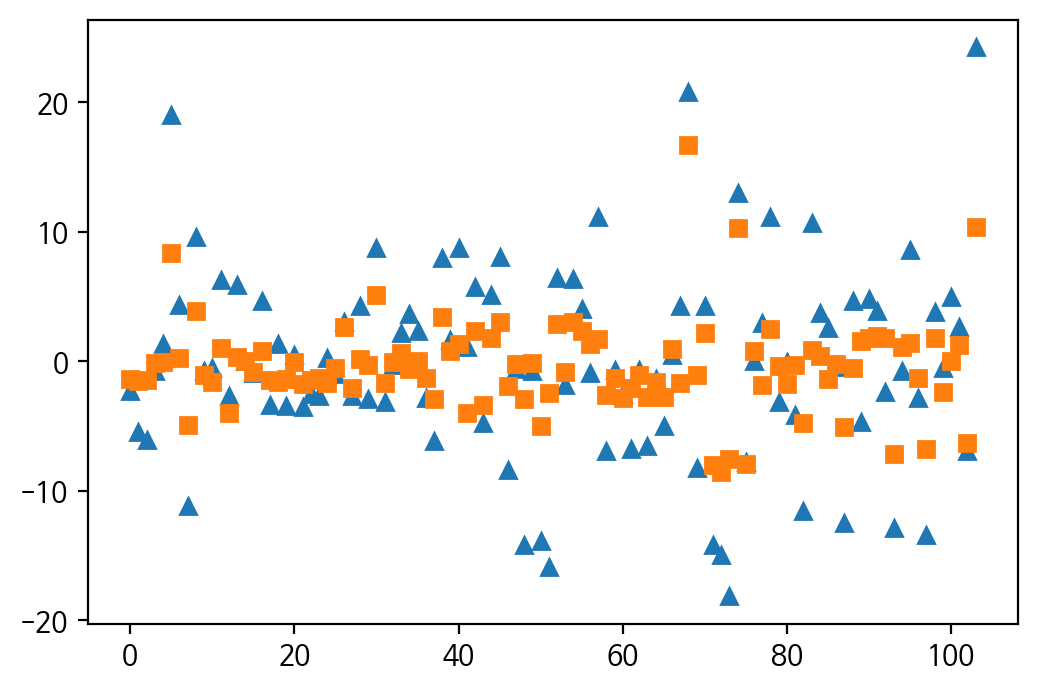

In [39]:
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi = 200)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()


#Lasso

## 확장된 보스턴 주택가격 데이터셋에 라쏘를 적용

In [40]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'. format(lasso.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso.score(X_test, y_test))) #과소적합 상태
print('사용한 특성의 개수:', np.sum(lasso.coef_ !=0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수: 4


과소적합을 줄이기 위해사 alpha 값 설정

In [41]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'. format(lasso001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso001.score(X_test, y_test))) #과소적합 상태
print('사용한 특성의 개수:', np.sum(lasso001.coef_ !=0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수: 32


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318007, tolerance: 3.233182126649076
  positive)


**선형 분류 모델의 c설정에 따른 결정 경계**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


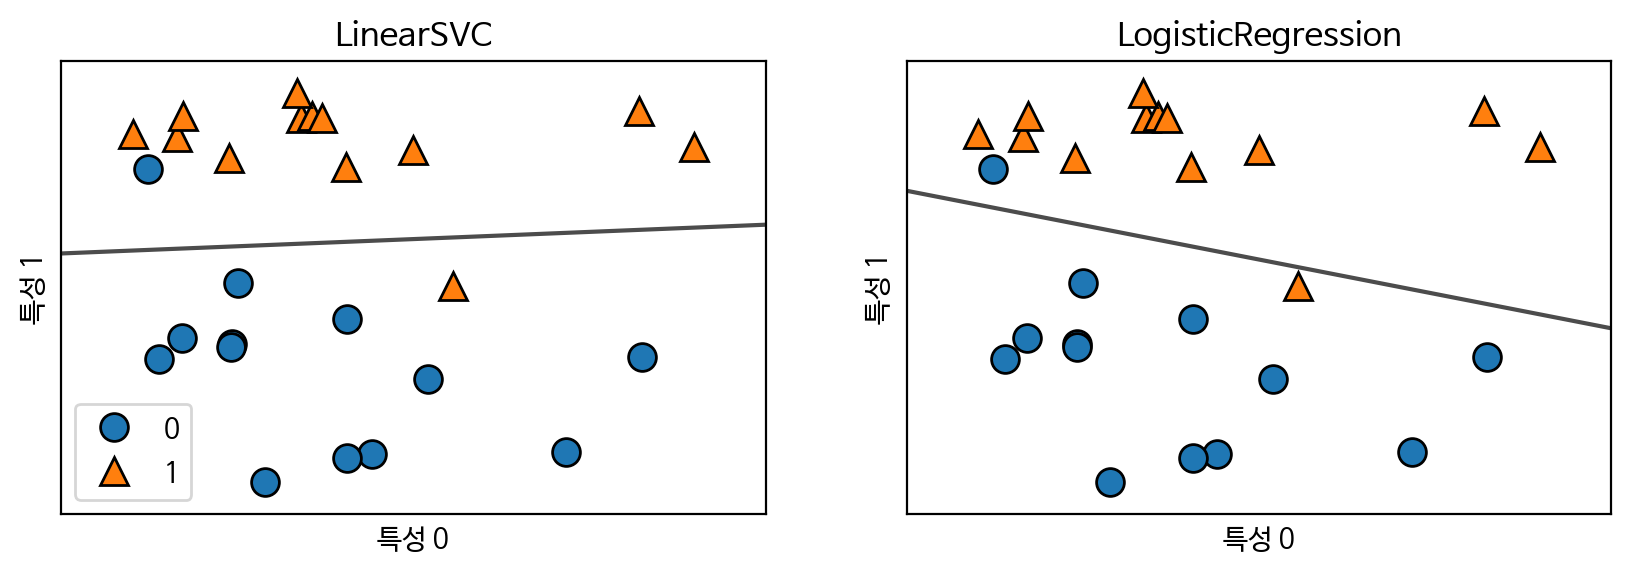

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi']  = 200

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()


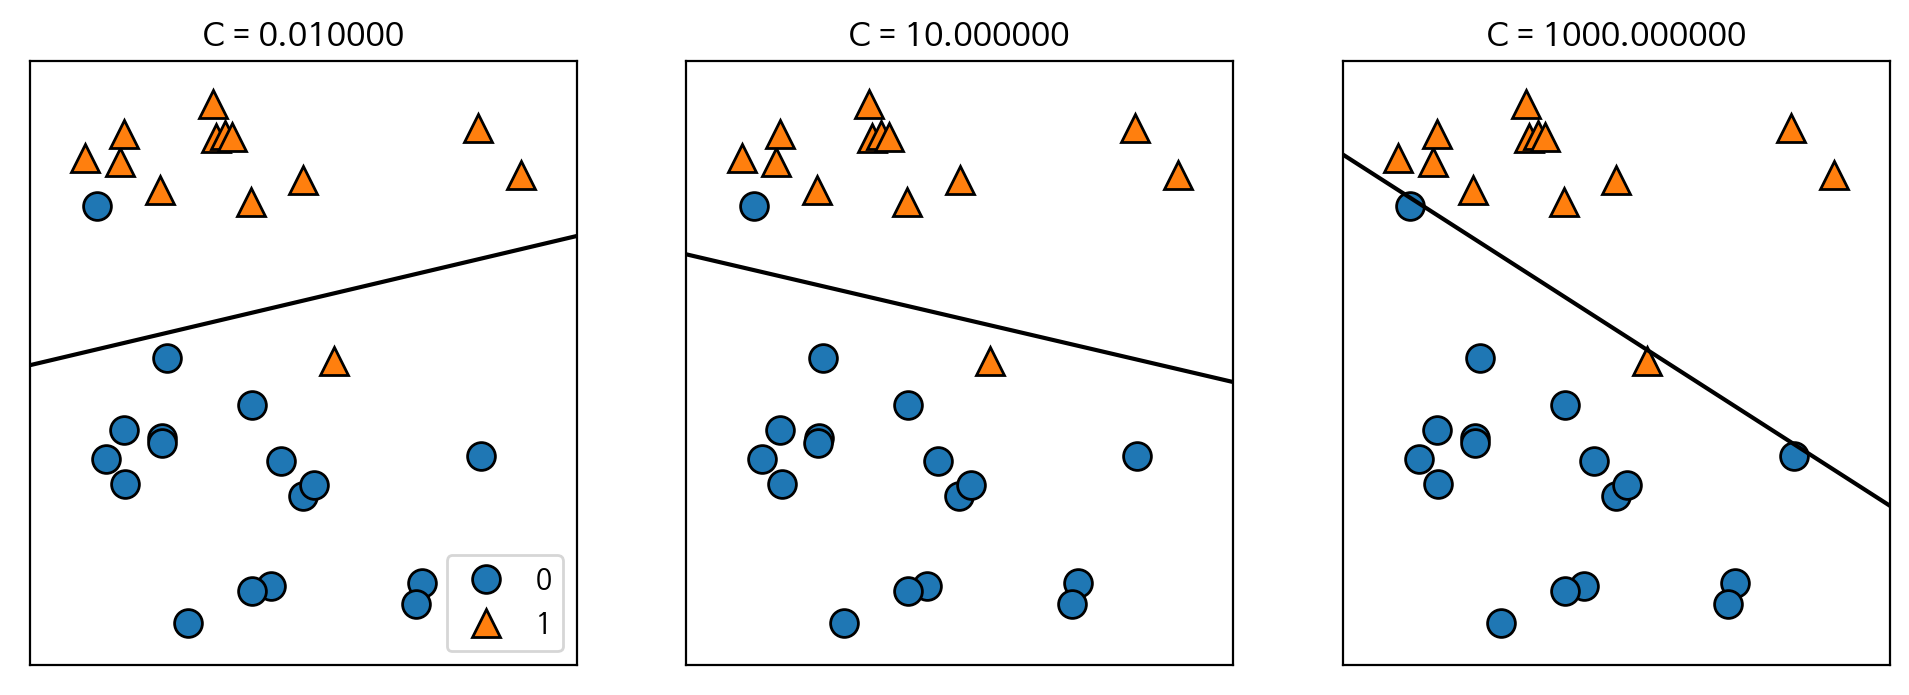

In [43]:
# C의 값이 낮을수록 -> 규제 높음(과소 적합)
# C의 값이 높을수록 -> 규제완화
mglearn.plots.plot_linear_svc_regularization()


# 유방암 데이터셋을 사용한 로지스틱 회귀 LogisticRegression 성능 평가

규제의 강도를 결정하는 매개변수 C값 설정에 따른 유방암 데이터셋을 사용한 성능 평가 비교 

In [45]:
# 데이터 준비하기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer() # 데이터 다운로드

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=42)

# LogisticRegression C=1 (디폴트)

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train) # 규제 C=1

print('훈련 세트 점수 : {:.3f}'. format(logreg.score(X_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg.score(X_test, y_test)))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


# LogisticRegression C=100 (디폴트)

In [51]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train) # 규제 C=1

print('훈련 세트 점수 : {:.3f}'. format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.972


L1은 일부만 가지고 규제를 줌
L2는 모두 동일하게 규제를 줌 

# LogisticRegression C=100 (규제 완화) L2 규제

In [60]:
logreg100 = LogisticRegression( C=100, max_iter=5000).fit(X_train, y_train) # 규제 C=1
# 디폴트 l2
print('훈련 세트 점수 : {:.3f}'. format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.972


# LogisticRegression C=100 (규제 완화) L1 규제

In [61]:
lr_l1 = LogisticRegression(solver='liblinear', C=100, penalty='l1', max_iter=5000).fit(X_train, y_train) # 규제 C=1

print('훈련 세트 점수 : {:.3f}'. format(lr_l1.score(X_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(lr_l1.score(X_test, y_test)))


훈련 세트 점수 : 0.986
테스트 세트 점수 : 0.979


# LogisticRegression C=0.01 (규제 강화)

In [54]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train) # 규제 C=1

print('훈련 세트 점수 : {:.3f}'. format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg001.score(X_test, y_test)))

# ↓ 규제를 꼭 강화하는 것이 좋은 것은 아니라는 것을 알 수 있음 C=0.01이 C=100보다 좋은 수치를 보임 

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


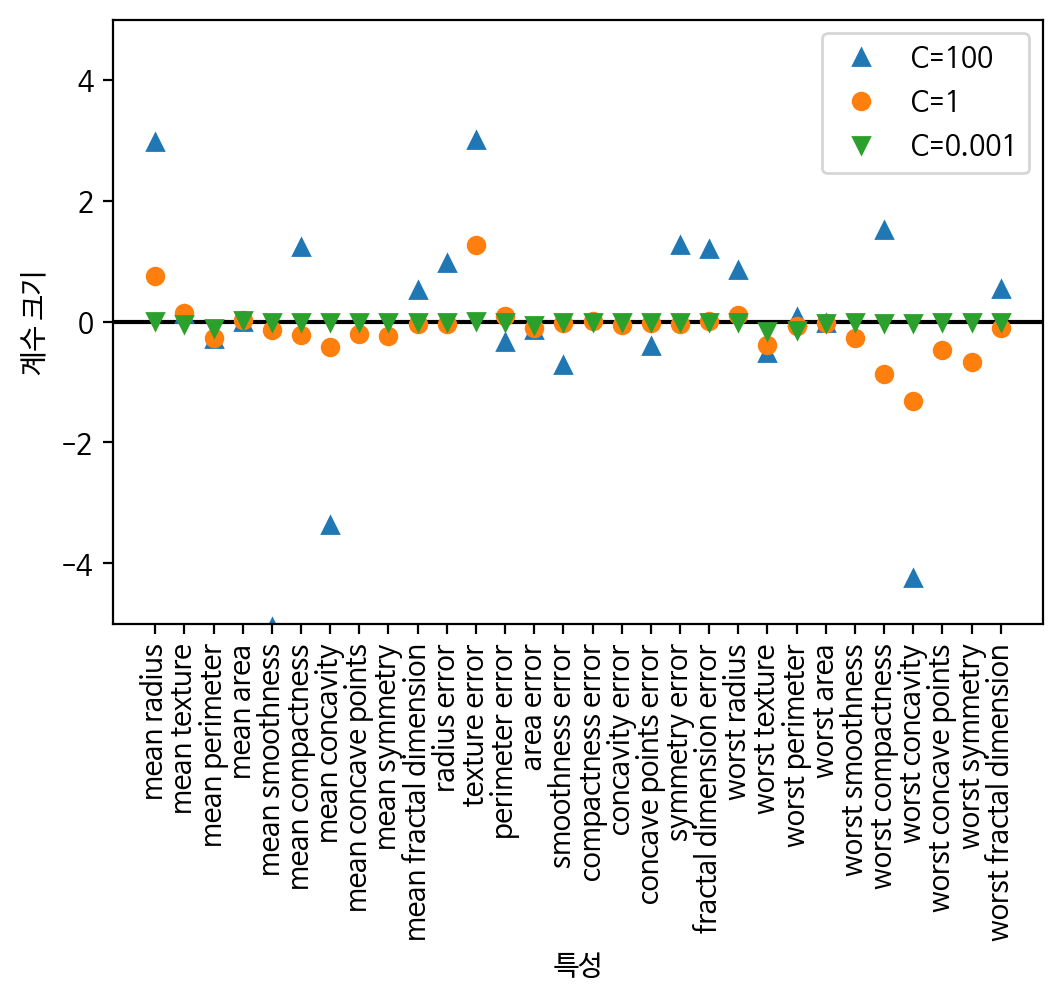

In [55]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()


## L1 규제를 통한 특성확인

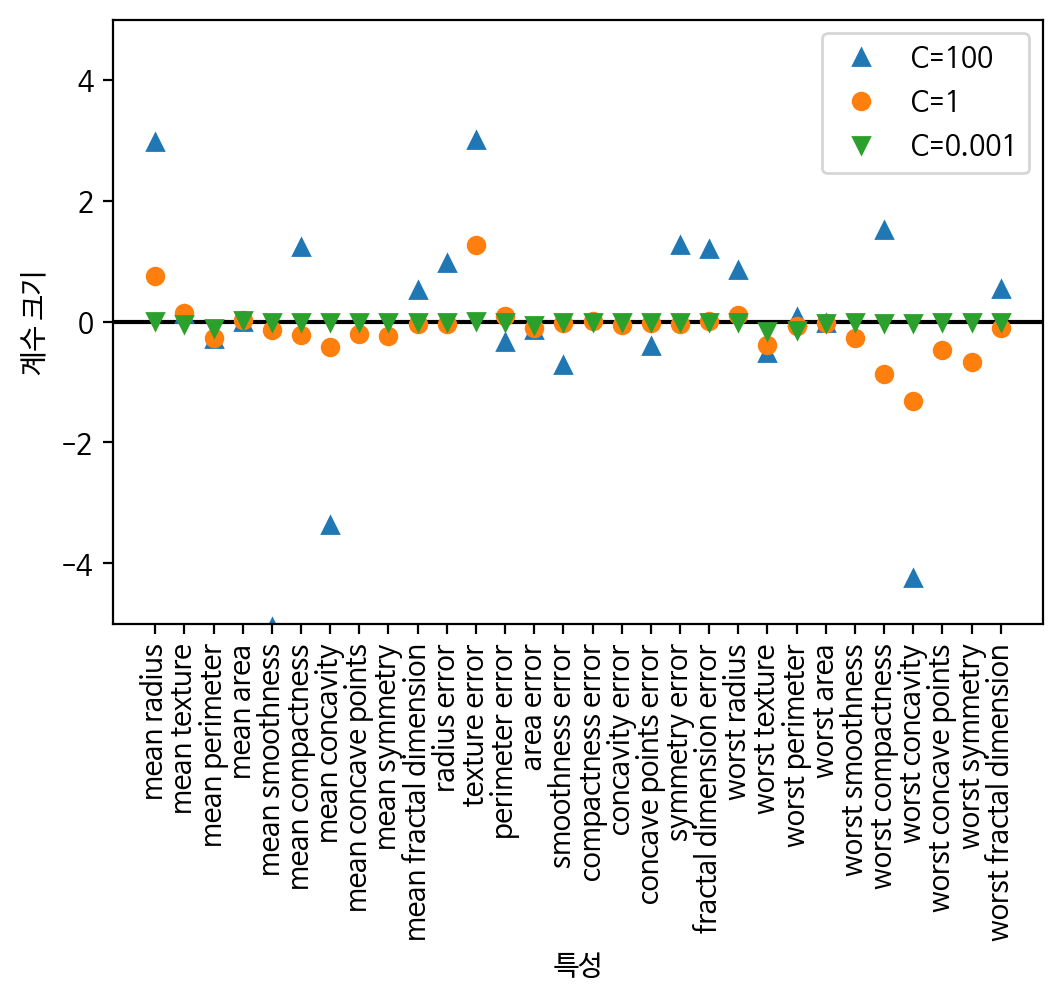

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


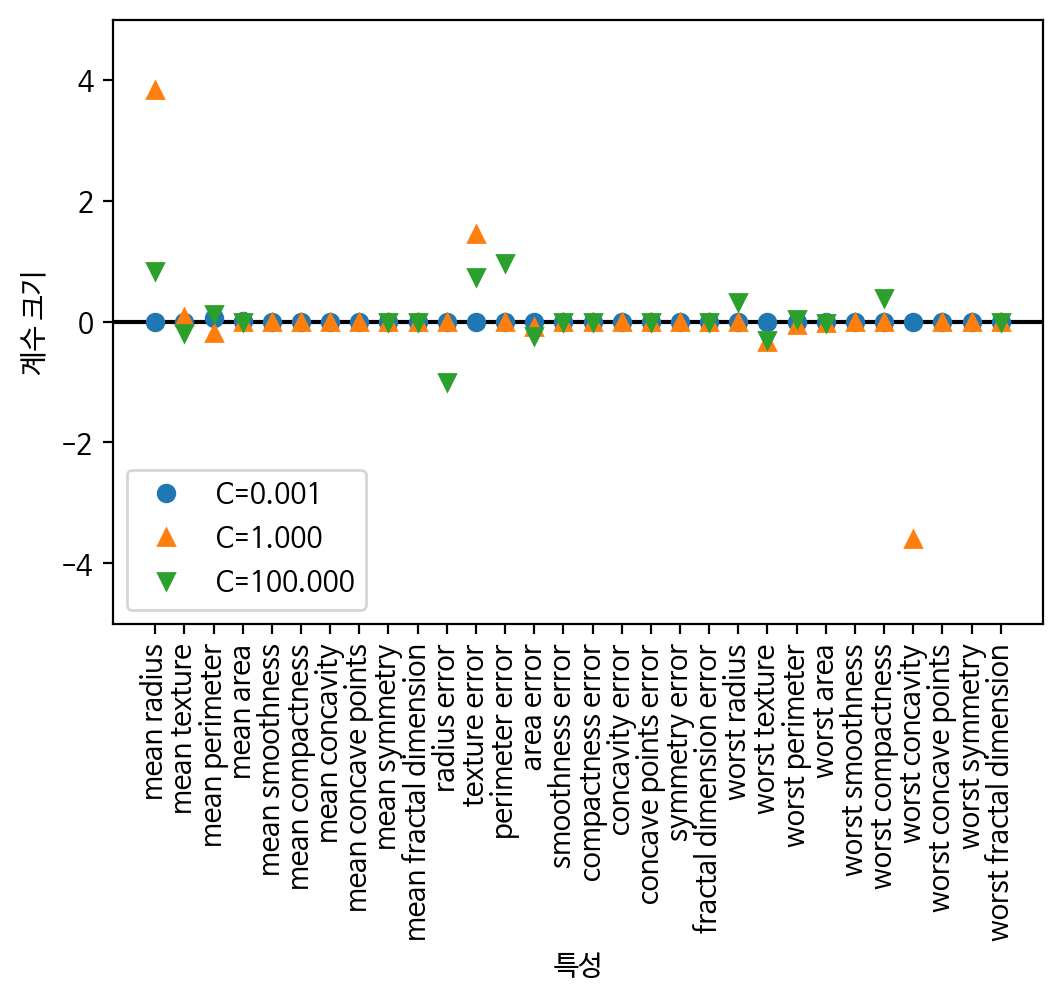

In [56]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):  # ↓ Penalty에 규제 방법을 적으면 됨
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

In [ ]:
# 